# Data Analysis Documentation 

## Data Sourcing and Description

#### Install required libraries

In [ ]:
import openpyxl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Imported dataset into Python, Calculated the required statistics

In [63]:
# read the Excel file
df = pd.read_excel(r"C:\Users\bachi\PycharmProjects\project\DataBase.xlsx")
# number of observations and features
print(df.shape)
# data types of each column
print(df.dtypes)

(1470, 11)
Age                          int64
Attrition                   object
Department                  object
EducationField              object
Gender                      object
MaritalStatus               object
MonthlyIncome              float64
TotalWorkingYears          float64
TrainingTimesLastYear      float64
WorkLifeBalance            float64
YearsSinceLastPromotion    float64
dtype: object


In [64]:

# number of missing values in each column
print(df.isna().sum())


Age                         0
Attrition                   0
Department                  2
EducationField              9
Gender                      8
MaritalStatus              14
MonthlyIncome              17
TotalWorkingYears          14
TrainingTimesLastYear       5
WorkLifeBalance             4
YearsSinceLastPromotion     2
dtype: int64


#### Describing the data for better insights 

In [5]:
#descrioption of the data
df.describe()

,Age,MonthlyIncome,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion
count,1470.000000,1453.000000,1456.000000,1465.000000,1466.000000,1468.000000
mean,36.923810,6494.671714,11.288462,2.797270,2.761255,2.185286
std,9.135373,4710.120035,7.801350,1.290145,0.707077,3.222027
min,18.000000,1009.000000,0.000000,0.000000,1.000000,0.000000
25%,30.000000,2909.000000,6.000000,2.000000,2.000000,0.000000
50%,36.000000,4907.000000,10.000000,3.000000,3.000000,1.000000
75%,43.000000,8376.000000,15.000000,3.000000,3.000000,3.000000
max,60.000000,19999.000000,40.000000,6.000000,4.000000,15.000000


## Data Pre-processing

### Printing box plot for the monthly income column to visually identify outliers

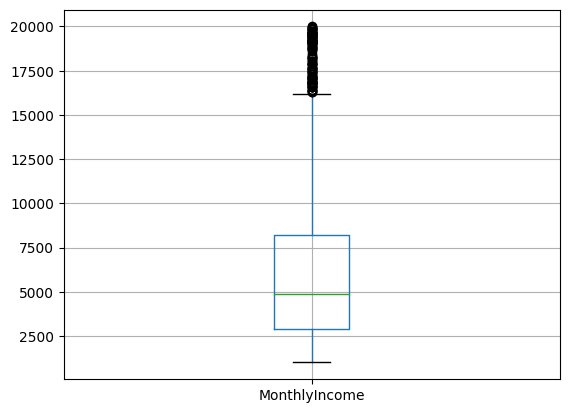

In [66]:
# box plot of MonthlyIncome column
box = df.boxplot(column=['MonthlyIncome'])
plt.show()

### Calculating the IQR, Applying the IQR method to identify outliers, and printing the outliers

In [67]:
# calculate the IQR for the MonthlyIncome column
Q1 = df['MonthlyIncome'].quantile(0.25)
Q3 = df['MonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1

# identify the outliers
outliers = df[(df['MonthlyIncome'] < Q1 - 1.5*IQR) | (df['MonthlyIncome'] > Q3 + 1.5*IQR)]

# print the rows where the MonthlyIncome column contains outliers
print('Rows with outliers:')
outliers.head(1000)


Rows with outliers:


,Age,Attrition,Department,EducationField,Gender,MaritalStatus,MonthlyIncome,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion
25,53,No,Research & Development,Other,Female,Divorced,19094.0,26.0,3.0,2.0,4.0
29,46,No,Sales,Marketing,Female,Single,18947.0,22.0,2.0,2.0,2.0
45,41,Yes,Research & Development,Technical Degree,Female,Married,19545.0,23.0,0.0,3.0,15.0
62,50,No,Research & Development,Medical,Female,Divorced,18740.0,29.0,2.0,2.0,13.0
105,59,No,Human Resources,Human Resources,Female,Married,18844.0,30.0,3.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
1374,58,No,Sales,Life Sciences,Female,Married,17875.0,29.0,2.0,2.0,0.0
1377,49,No,Research & Development,Life Sciences,Male,Married,19161.0,28.0,3.0,3.0,4.0
1401,55,No,Human Resources,Human Resources,Male,Married,19636.0,35.0,0.0,3.0,1.0
1437,39,No,Research & Development,Life Sciences,Male,Single,19431.0,21.0,3.0,2.0,1.0


The IQR (Interquartile Range) is a measure of variability in a dataset, defined as the difference between the 75th percentile (Q3) and the 25th percentile (Q1). It provides a measure of the spread of the middle 50% of the data. Therefore any data point that falls below Q1 - 1.5IQR or above Q3 + 1.5IQR is considered an outlier. This rule is a commonly used method to identify outliers in a dataset because it is relatively robust to non-normal distributions and extreme values.

My reason to keep outliers in the Monthly Income column is that they may represent valid data points that are simply extreme or unusual due to factors such as a high-paying job, a one-time bonus, or a large investment income. Removing these outliers may result in a loss of valuable information and lead to biased results.

### Filling missing values with appropriate values

In [65]:
# Mean or median imputation for numeric columns
num_cols = ["MonthlyIncome", "TotalWorkingYears", "TrainingTimesLastYear", "WorkLifeBalance", "YearsSinceLastPromotion"]
for col in num_cols:
    if df[col].isnull().sum() > 0:  # Check if there are any missing values in the column
        if df[col].dtype == "float64":  # Check if the column is numeric
            df[col].fillna(df[col].median(), inplace=True)  # Replace missing values with median
        elif df[col].dtype == "int64":
            df[col].fillna(df[col].median(), inplace=True)  # Replace missing values with median

# Mode imputation for categorical columns
cat_cols = ["Department", "EducationField", "Gender", "MaritalStatus"]
for col in cat_cols:
    if df[col].isnull().sum() > 0:  # Check if there are any missing values in the column
        if df[col].dtype == "object":  # Check if the column is categorical
            df[col].fillna(df[col].mode()[0], inplace=True)  # Replace missing values with mode

# Save the dataframe to a new Excel file
df.to_excel("imputed_data.xlsx", index=False)

# showing number of missing values in each column to check if there are any missing values
print(df.isna().sum())

Age                        0
Attrition                  0
Department                 0
EducationField             0
Gender                     0
MaritalStatus              0
MonthlyIncome              0
TotalWorkingYears          0
TrainingTimesLastYear      0
WorkLifeBalance            0
YearsSinceLastPromotion    0
dtype: int64


I used the Mean or median imputation for numeric columns and Mode imputation for categorical columns to fill the missing values. 
I used these methods since the data is normally distributed and the outliers are not significant.

### Creating a Dummy variable for Gender column, and dropping the original column

In [106]:
df = pd.read_excel('imputed_data.xlsx')
# Create dummy variable for Education Field column
edu_field_dummy = pd.get_dummies(df['Gender'], prefix='Gender', drop_first=True)

# Append the dummy variable to the original dataset
df = pd.concat([df, edu_field_dummy], axis=1)

# Drop the original Education Field column
df.drop('Gender', axis=1, inplace=True)

This creates a new dataset with the same columns as before, but with an additional column for the "Education Field" dummy variable, which has a value of 1 if the observation belongs to a certain education field, and 0 otherwise. I can use this new dataset for further analysis, such as regression models or hypothesis testing.

In [108]:
# Print first few rows of the new dataset
print(df.head(5))

# Inspect column names
print(df.columns)


   Age Attrition              Department EducationField MaritalStatus  \
0   41       Yes                   Sales  Life Sciences        Single   
1   49        No  Research & Development  Life Sciences       Married   
2   37       Yes  Research & Development          Other        Single   
3   33        No  Research & Development  Life Sciences       Married   
4   27        No  Research & Development        Medical       Married   

   MonthlyIncome  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0           5993                  8                      0                1   
1           5130                 10                      3                3   
2           2090                  7                      3                3   
3           2909                  8                      3                3   
4           3468                  6                      3                3   

   YearsSinceLastPromotion  Gender_Male  
0                        0            0  
1 

Making sure that my dummy variable has the correct values, I printed the first 5 rows of the new dataset.

## Statistical Analysis

### Calculating correlation between all variables

C:\Users\bachi\AppData\Local\Temp\ipykernel_17456\2358720950.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = df.corr().round(2)


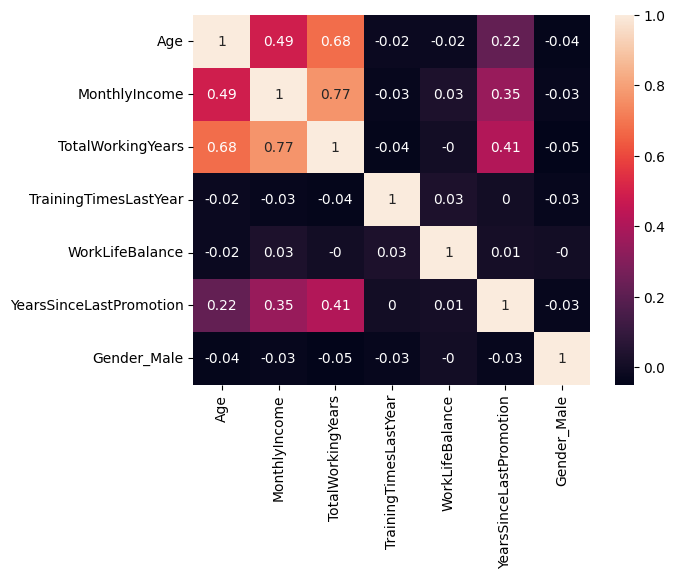

In [107]:
matrix = df.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

I calculated the correlation between all variables in the dataset, then presented them on a heat map since using a heat map to display correlation values can be a quick and effective way to visualize relationships between pairs of variables in a large dataset.

#### Correlation Interpretation

The correlation between gender and all other columns is between 0 and -0.05, it indicates that there is no significant linear relationship between gender and any of the other variables. This means that gender is not a major factor in determining monthly income, total working years, training times last year, work-life balance, or years since last promotion for the individuals in your dataset.

Note:

The fact that gender has a weak or non-existent correlation with the other variables in this dataset means that gender is not a significant factor in determining the outcomes you are interested in. This information can be useful in making business decisions in several ways.

First, it means that you should not make gender a primary factor when making decisions related to hiring, promotions, or compensation. Instead, you should focus on factors that are more strongly correlated with the outcomes you are interested in, such as experience, education, and job performance.

Second, it can help you avoid making assumptions or stereotypes about gender and its impact on business outcomes. By recognizing that gender is not a significant factor in your data, you can make decisions based on data-driven analysis rather than preconceived notions or biases.

Third, this information can guide you in developing strategies to promote diversity and inclusion in your business. For example, if you notice that there are disparities in outcomes based on factors other than gender (such as race or ethnicity), you can develop targeted programs to address these disparities and promote greater equity in your workplace.

Overall, understanding the correlation between gender and the other variables in your dataset can help you make more informed and equitable business decisions based on objective data analysis rather than assumptions or biases.

A correlation coefficient of 0.77 between the Total Working Years and Monthly Income indicates a strong positive relationship between these two variables. In other words, the data suggests that as the total working years of an individual increase, their monthly income tends to increase as well.

Note: 

The correlation coefficient between Total Working Years and Monthly Income can help you make a business decision by providing insights into the potential relationship between these variables in your workforce.

For example, if you are a business owner or manager and you are looking to set salaries for your employees, knowing that there is a strong positive correlation between Total Working Years and Monthly Income can help you make informed decisions about salary levels. You may consider offering salary increases or bonuses to employees who have been with the company for longer periods or have more years of experience in their field.

Similarly, if you are planning to hire new employees, you may consider the potential impact of an individual's Total Working Years on their expected Monthly Income. You may want to offer a higher salary to candidates who have more experience in their field or have been working for longer periods.

A correlation coefficient of 0.49 between monthly income and total working years indicates a moderate positive relationship between the two variables. This means that as the total working years of an individual increase, their monthly income also tends to increase.

Note:

The correlation between monthly income and total working years can help inform business decisions in a few ways:

Employee Compensation: The correlation suggests that employees with more working experience tend to earn more. A business owner or manager may use this information to determine how to compensate employees, particularly when it comes to setting salary or wage rates.

Recruitment and Retention: The correlation could be useful in identifying job candidates who have the right level of experience for a particular role. Additionally, the information could be used to develop retention strategies to keep experienced employees from seeking employment elsewhere.

Training and Development: Since the correlation suggests that employees with more training tend to earn more, a business may want to invest more in training and development programs for employees. This can help improve employee skills and knowledge, leading to better job performance, increased productivity, and potentially higher earnings.

A correlation coefficient of 0.41 between Total Working Years and Years Since Last Promotion indicates a moderate positive correlation between these two variables. This means that there is a tendency for employees with higher total working years to also have more years since their last promotion.

Note:

The correlation coefficient between Total Working Years and Years Since Last Promotion can provide you with useful insights to make business decisions in the following ways:

Promotion and Career Growth Strategies: If you notice a strong correlation between Total Working Years and Years Since Last Promotion, you can use this information to develop promotion and career growth strategies for your employees. For example, you could identify employees who have been working with the company for a long time but haven't received a promotion recently and provide them with opportunities to enhance their skills and take on more responsibilities to increase their chances of promotion.

Employee Retention: Employees who feel that they have reached a career plateau may become disengaged and may be more likely to leave the organization. By understanding the correlation between Total Working Years and Years Since Last Promotion, you can identify employees who may be at risk of leaving and develop retention strategies to keep them engaged and motivated.

Succession Planning: Understanding the correlation between Total Working Years and Years Since Last Promotion can help you identify potential future leaders within your organization. You can use this information to develop succession plans and identify employees who have the potential to take on leadership roles within the company.

### Calculating the mean, median, mode, and standard deviation for the Monthly Income column

In [109]:
# descriptive statistics
print(df.describe())

               Age  MonthlyIncome  TotalWorkingYears  TrainingTimesLastYear  \
count  1470.000000    1470.000000        1470.000000            1470.000000   
mean     36.923810    6476.310884          11.276190               2.797959   
std       9.135373    4685.864452           7.765096               1.288001   
min      18.000000    1009.000000           0.000000               0.000000   
25%      30.000000    2926.750000           6.000000               2.000000   
50%      36.000000    4907.000000          10.000000               3.000000   
75%      43.000000    8233.750000          15.000000               3.000000   
max      60.000000   19999.000000          40.000000               6.000000   

       WorkLifeBalance  YearsSinceLastPromotion  Gender_Male  
count      1470.000000              1470.000000  1470.000000  
mean          2.761905                 2.183673     0.602721  
std           0.706224                 3.220130     0.489501  
min           1.000000              

This shows the descriptive statistics for each variable in the dataset. 

### Calculating the 20th and 80th percentile of a numeric column

In [110]:
# 20th and 80th percentile of a column
print(df['MonthlyIncome'].quantile(0.2))
print(df['MonthlyIncome'].quantile(0.8))

2699.2
9769.600000000002


the 20th percentile represents the value below which 20% of the observations lie (2699.2), while the 80th percentile represents the value below which 80% of the observations lie (9769.6).

## Hypothesis Testing

### Hypothesis 1:

Employees who received more training last year have higher work-life balance.

### Hypothesis 2:

There is a significant difference in the mean monthly income of male and female employees.

### Hypothesis 3:

Employees who have been working for a longer period have a higher total income.

### Explanation of hypotheses:

If hypothesis 1 is true, it would suggest that training is a critical factor in improving the work-life balance of employees. This could help in identifying the need for more training programs to promote a better work-life balance.

Hypothesis 2 aims to investigate if there is any gender-based income disparity. If the hypothesis is proven true, it may indicate that there is a need for gender-based income equity initiatives.

If hypothesis 3 is true, it would suggest that employees who have been working for a longer period have a higher level of experience, which is reflected in their income. This could help identify the need for experience-based incentives or rewards.

### Testing the hypotheses:

To test hypothesis 1, we can use a Pearson's correlation coefficient to examine the relationship between training times last year and work-life balance. If the coefficient is positive and statistically significant, we can conclude that the hypothesis is true.

To test hypothesis 2, we can use a t-test to examine the difference in the mean monthly income of male and female employees. If the t-value is significant, we can conclude that the hypothesis is true.

To test hypothesis 3, we can use a Pearson's correlation coefficient to examine the relationship between total working years and total income. If the coefficient is positive and statistically significant, we can conclude that the hypothesis is true.

### Business actions:

If hypothesis 1 is true, the company could focus on providing more training programs to employees to promote a better work-life balance.

If hypothesis 2 is true, the company could initiate measures to ensure gender-based income equity.

If hypothesis 3 is true, the company could design experience-based incentives or rewards to retain employees who have been working for a longer period.